# Exploration of job-seeking behavior
The following explores data from a labour force survey undertaken by Eurostat
https://ec.europa.eu/eurostat/web/microdata/labour-force-survey

## Part 1 Visual group comparisons and deep dive into gender differences
### Questions: 
- Is there a difference between countries?
- Is there a difference between men and women?
- Have methods changed over time?

In [1167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_ind
from IPython.display import display
pd.options.display.max_rows = 200


In [1168]:
# list of method columns in preferred order
mets = ['METHODE','METHODF','METHODC','METHODD','METHODA','METHODB','METHODG','METHODH','METHODI',\
            'METHODJ','METHODK','METHODL', 'METHODM']

# function for 
def load_data(file):
    '''
    INPUT
        CSV file with survey data
    OUTPUT
        Data frame limited to job seekers
        
    Replaces 9 with nan. An entry of 9 means 'not relevant', 
    meaning the respondents are not utilizing a method and if all 
    columns are entered as 9, the row is removed
    '''
    df = pd.read_csv(file)
    m = df[mets].replace(9,np.nan)
    m= m.dropna(how= 'all')
    df = df.iloc[m.index]
    df= df.dropna(how= 'all', axis=1)
    return df


In [1169]:
denmark_13 = pd.read_csv('DK_LFS_2004_Y.csv')
denmark_13.shape

(15445, 169)

In [1170]:

dk_13[mets]

,METHODE,METHODF,METHODC,METHODD,METHODA,METHODB,METHODG,METHODH,METHODI,METHODJ,METHODK,METHODL,METHODM
0,1,1,1,1,1,1,0,0,0,1,0,0,0
1,1,1,1,1,1,0,0,0,0,1,1,0,0
2,1,1,1,1,1,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8873,0,0,1,1,0,0,0,0,0,0,0,0,0
8874,1,1,1,1,1,0,0,0,0,1,0,0,0
8875,1,1,1,1,1,0,0,0,0,1,0,0,0
8876,0,0,0,0,0,0,0,0,0,1,0,0,0


In [1171]:
# load data into dataframes
dk_13 = pd.read_csv('dk_13.csv')
print(dk_13.shape)

dk_04 = pd.read_csv('dk_04.csv')
print(dk_04.shape)

es_13 = pd.read_csv('es_13.csv')
print(es_13.shape)

es_04 = pd.read_csv('es_04.csv')
print(es_04.shape)

ro_13 = pd.read_csv('ro_13.csv')
print(ro_13.shape)

ro_04 = pd.read_csv('ro_04.csv')
print(ro_04.shape)


(8878, 82)
(1377, 79)
(15271, 83)
(12692, 80)
(7750, 83)
(2874, 80)


In [1172]:
# load data
de_13 =pd.read_csv('de_13.csv')
print(de_13.shape)

fi_13 = pd.read_csv('fi_13.csv')
print(fi_13.shape)

fr_13 = pd.read_csv('fr_13.csv')
print(fr_13.shape)

lv_13 = pd.read_csv('lv_13.csv')
print(lv_13.shape)

pt_13 = pd.read_csv('pt_13.csv')
print(pt_13.shape)

at_13 = pd.read_csv('at_13.csv')
print(at_13.shape)



(21931, 105)
(3090, 101)
(27229, 83)
(2522, 83)
(16314, 83)
(6078, 83)


In [1173]:
#load data
bg_13 = pd.read_csv('bg_13.csv')
print(bg_13.shape)

be_13 = pd.read_csv('be_13.csv')
print(be_13.shape)

ie_13 = pd.read_csv('ie_13.csv')
print(ie_13.shape)

cy_13 = pd.read_csv('cy_13.csv')
print(cy_13.shape)

it_13 = pd.read_csv('it_13.csv')
print(it_13.shape)

ee_13 = pd.read_csv('ee_13.csv')
print(it_13.shape)

(1915, 83)
(5645, 83)
(14562, 83)
(3921, 83)
(32418, 83)
(32418, 83)


In [1174]:
# load data

hu_13 = pd.read_csv('hu_13.csv')
print(hu_13.shape)

lt_13 = pd.read_csv('lt_13.csv')
print(lt_13.shape)

mt_13 = pd.read_csv('mt_13.csv')
print(mt_13.shape)

nl_13 = pd.read_csv('nl_13.csv')
print(nl_13.shape)

si_13 = pd.read_csv('si_13.csv')
print(si_13.shape)

sk_13 = pd.read_csv('sk_13.csv')
print(sk_13.shape)

lu_13 = pd.read_csv('lu_13.csv')
print(lu_13.shape)

el_13 = pd.read_csv('el_13.csv')
print(el_13.shape)



(12181, 106)
(4186, 83)
(1062, 83)
(6443, 106)
(4055, 106)
(7787, 83)
(804, 83)
(22777, 83)


In [1133]:
#Function for dividing data sets by SEX

def sep_sex(df):
    '''INPUT: data frame
       OUTPUT: 2 data frames separate by sex
       '''
    f_df = df[df['SEX']==2]
    m_df = df[df['SEX']==1]
    
    return f_df, m_df

In [1134]:
#Function for dividing data sets by AGE (below 40 years and above 40 years)

def sep_age(df):
    """ INPUT: 
            dataframe
        OUTPUT: 
            two data frames separated by 
            age (under 40 and over 40)"""
    
    y_df = df[df['AGE'] > 40]
    o_df = df[df['AGE'] <= 40]
    
    return y_df, o_df

In [1135]:
f_04,m_04 = sep_sex(dk_13)
f_13, m_13 = sep_sex(dk_04)

In [1136]:
#Divide french, german and italian datasets by sex
f_fr,m_fr = sep_sex(fr_13)
f_de,m_de = sep_sex(de_13)
f_it,m_it = sep_sex(it_13)

In [1137]:
# Separate Spanish data by sex for 2004 and 2013
f_es, m_es = sep_sex(es_13)
f_ro, m_ro = sep_sex(ro_13)

In [1138]:
# Separate full data sets by sex for each country
f_bg, m_bg = sep_sex(bg_13)
f_ie, m_ie = sep_sex(ie_13)
f_be, m_be = sep_sex(be_13)
f_pt, m_pt = sep_sex(pt_13)
f_lv, m_lv = sep_sex(lv_13)
f_fi, m_fi = sep_sex(fi_13)
f_cy, m_cy = sep_sex(cy_13)
f_at, m_at = sep_sex(at_13)
f_lu, m_lu = sep_sex(at_13)


In [1139]:
# Separate full data sets by sex for each country

f_ee, m_ee = sep_sex(ee_13)
f_hu, m_hu = sep_sex(hu_13)
f_lt, m_lt = sep_sex(lt_13)
f_si, m_si = sep_sex(si_13)
f_sk, m_sk = sep_sex(sk_13)
f_nl, m_nl = sep_sex(nl_13)
f_mt, m_mt = sep_sex(mt_13)
f_lu, m_lu = sep_sex(lu_13)


In [1140]:
# separate Danish, Spanish and Romanian by age
young_dk, old_dk = sep_age(ro_13)

young_es, old_es = sep_age(es_13)

young_ro, old_ro = sep_age(ro_13)

<AxesSubplot:>

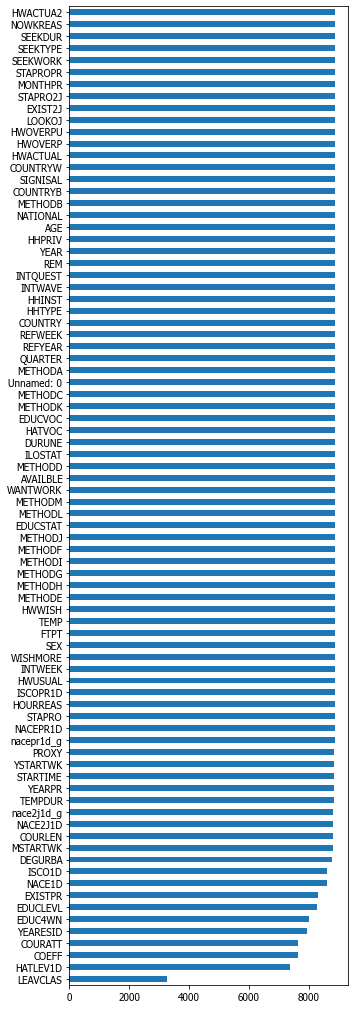

In [1141]:
# visualize missing values
plt.rcParams['figure.figsize'] = [5,18]

dk_13.count().sort_values().plot(kind='barh')

In [1142]:
# explore values 
dk_13.METHODC.value_counts()

1    5843
0    3035
Name: METHODC, dtype: int64

In [1143]:
# Descriptions of method columns
methods = ['Answered job ads', 'Studied job ads', 'Direct contact w/employers', \
           'Friends, relatives, unions','Public empl. office', 'Private empl. office',\
          'Test, interview or exam','Land or equipment', 'Looked for permits/licences' ,'Awaiting results',\
          'Waiting for a call', 'Competition', 'Other']
len(methods)

13

In [1144]:
# plot horizontal bar chart of aggregated method columns emphacizing 3 important methods

def plot_method2h(df_1, df_2, title, legend):
    
    """
    INPUT: list of data frames to be compared
    OUTPUT: histogram comparing the distribution of methods for each data frame
    """
    
    plt.clf
    mpl.rcParams.update(mpl.rcParamsDefault)
    plt.rcParams['figure.figsize'] = [5,3]

    df_1 = df_1[mets]
    df_2 = df_2[mets]
    
    # sum each column (method) and divide by the sum of all methods in the df
    x_1= df_1[df_1.sum(axis=1)>0].sum()/df_1[df_1.sum(axis=1)>0].sum().sum()
    x_2= df_2[df_2.sum(axis=1)>0].sum()/df_2[df_2.sum(axis=1)>0].sum().sum()
    
    # plot results
    fig, ax = plt.subplots()

    x_axis = np.arange(df_2.shape[1])
    
    alphas1 = [0.7,0.7,0.7,0.2,0.2,0.2,0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
    alphas2 = [0.7,0.7,0.7,0.2,0.2,0.2,0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]

    rgba_colors = np.zeros((13,4))
    rgba_colors[:,0] = 1
    rgba_colors[:,1] = 0.1
    rgba_colors[:,2] = 0.1
    rgba_colors[:, 3] = alphas2
    
    rgba_colors1 = np.zeros((13,4))
    rgba_colors1[:,0] = 0.1
    rgba_colors1[:,1] = 0.2
    rgba_colors1[:,2] = 0.9
    rgba_colors1[:, 3] = alphas1

    ax.barh(x_axis-0.2, x_2, height= 0.4, color=rgba_colors)

    ax.barh(x_axis+0.2, x_1, height=0.4, color=rgba_colors1)
    
    for lh in ax.legend(legend, prop={'size': 12}).legendHandles: 
        lh.set_alpha(0.7)
        
    ax.set_yticks(x_axis, labels=methods, fontsize=11)
    ax.set_title(title, fontsize=16, y=1.04)
    plt.xlabel("Proportion of total activity", fontsize=11)
    ax.get_yticklabels()[0].set_weight('bold')
    ax.get_yticklabels()[1].set_weight('bold')
    ax.get_yticklabels()[2].set_weight('bold')
    plt.gca().invert_yaxis()
    ax.grid(visible=True,axis='x', alpha=0.5)

    plt.rcParams["font.family"] = 'Tahoma'


In [1145]:
# plot horizontal bar with all methods displayed equally

def plot_method2hgen(df_1, df_2, title, legend):
    
    """
    INPUT: list of data frames to be compared
    OUTPUT: histogram comparing the distribution of methods for each data frame
    """
    
    plt.clf
    mpl.rcParams.update(mpl.rcParamsDefault)
    plt.rcParams['figure.figsize'] = [5,3]

    df_1 = df_1[mets]
    df_2 = df_2[mets]
    
    # sum each column (method) and divide by the sum of all methods in the df
    x_1= df_1[df_1.sum(axis=1)>0].sum()/df_1[df_1.sum(axis=1)>0].sum().sum()
    x_2= df_2[df_2.sum(axis=1)>0].sum()/df_2[df_2.sum(axis=1)>0].sum().sum()
    
    # plot results
    fig, ax = plt.subplots()

    x_axis = np.arange(df_2.shape[1])
    
    alphas1 = [0.7,0.7,0.7,0.7,0.7,0.7,0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
    alphas2 =  [0.7,0.7,0.7,0.7,0.7,0.7,0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]

    rgba_colors = np.zeros((13,4))
    rgba_colors[:,0] = 1
    rgba_colors[:,1] = 0.1
    rgba_colors[:,2] = 0.1
    rgba_colors[:, 3] = alphas2
    
    rgba_colors1 = np.zeros((13,4))
    rgba_colors1[:,0] = 0.1
    rgba_colors1[:,1] = 0.2
    rgba_colors1[:,2] = 0.9
    rgba_colors1[:, 3] = alphas1


    ax.barh(x_axis+0.2, x_1, height=0.4, color=rgba_colors1)
    ax.barh(x_axis-0.2, x_2, height= 0.4, color=rgba_colors)

    
    for lh in ax.legend(legend, prop={'size': 12}).legendHandles: 
        lh.set_alpha(0.7)
        
    ax.set_yticks(x_axis, labels=methods, fontsize=11)
    ax.set_title(title, fontsize=16, y=1.04)
    plt.xlabel("Proportion of total activity", fontsize=11)

    plt.gca().invert_yaxis()
    ax.grid(visible=True,axis='x', alpha=0.5)


In [1146]:
# plot three different data sets

import matplotlib as mpl

# function for plotting 3 datasets 
def plot_method3(df_1, df_2, df_3, title):
    plt.clf()
    plt.rcParams['figure.figsize'] = [5, 3]

    # replace 9 with 0 to prevent the count of irrelevant entries and select method columns
    df_1 = df_1[mets]
    df_2 = df_2[mets]
    df_3 = df_3[mets]

    # sum each column (method) and divide by the sum of all methods in the df
    x_1= df_1[df_1.sum(axis=1)>0].sum()/df_1[df_1.sum(axis=1)>0].sum().sum()
    x_2= df_2[df_2.sum(axis=1)>0].sum()/df_2[df_2.sum(axis=1)>0].sum().sum()
    x_3= df_3[df_3.sum(axis=1)>0].sum()/df_3[df_3.sum(axis=1)>0].sum().sum()

    x_axis = np.arange(df_2.shape[1])
    plt.bar(x_axis - 0.2, x_1, width=0.2, align='center')
    plt.bar(x_axis, x_2, width=0.2, align='center')
    plt.bar(x_axis +0.2, x_3, width=0.2, align='center')
    plt.title(title)
    plt.legend()

    
    plt.xticks(ticks=np.arange(0,13,1), labels=methods, rotation=90)
    plt.legend(['Denmark', 'Romania', 'Spain'])


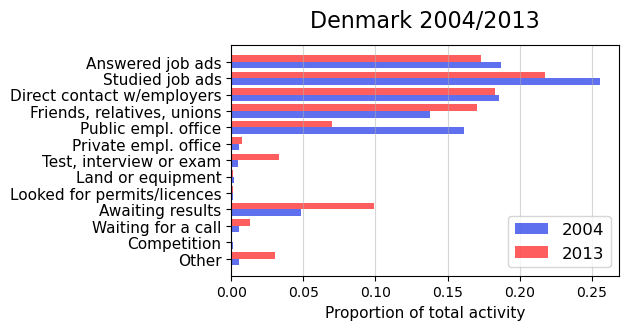

In [1147]:
# plot Denmark and Romania for 2004 and 2013
plt.rcParams["font.family"] = 'Tahoma'

plot_method2hgen(dk_04, dk_13, 'Denmark 2004/2013', ['2004', '2013'])


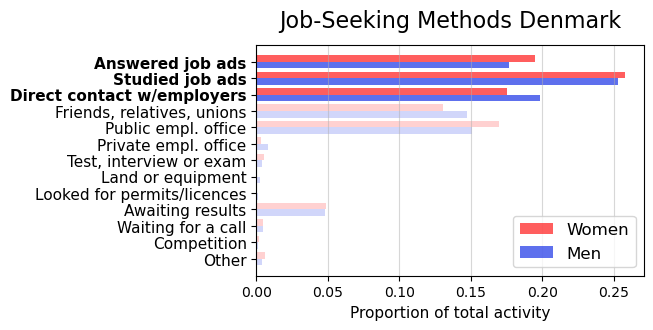

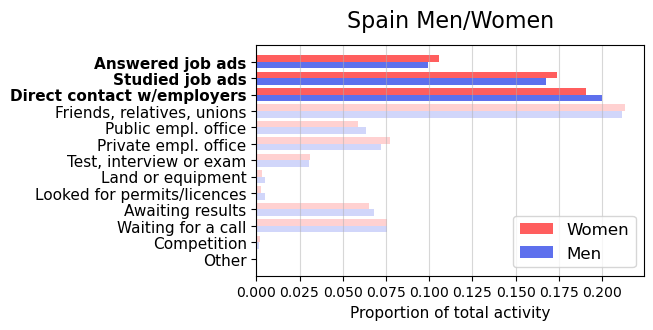

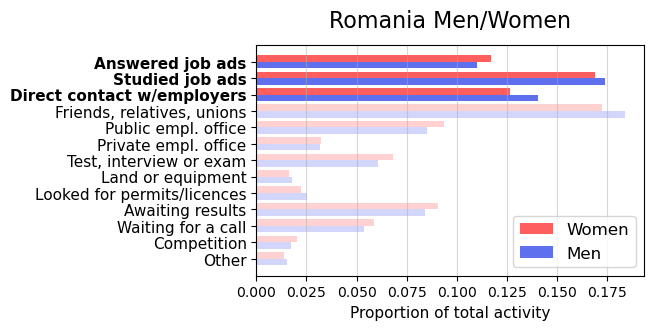

In [1148]:
# plot differences in sex for Denmark, Spain and Romania
plot_method2h(m_13, f_13, 'Job-Seeking Methods Denmark', ['Women', 'Men'])  
plt.show()
plot_method2h(m_es, f_es, 'Spain Men/Women', ['Women', 'Men'])
plt.show()
plot_method2h(m_ro, f_ro, 'Romania Men/Women',['Women', 'Men'])

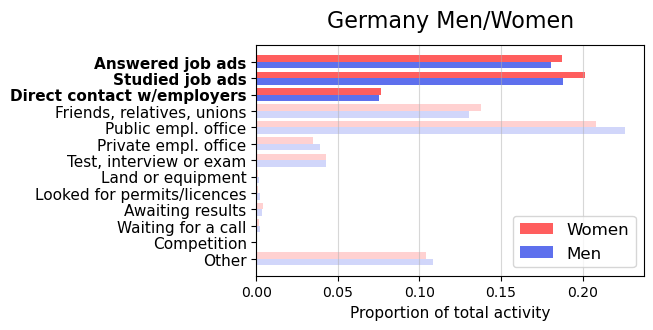

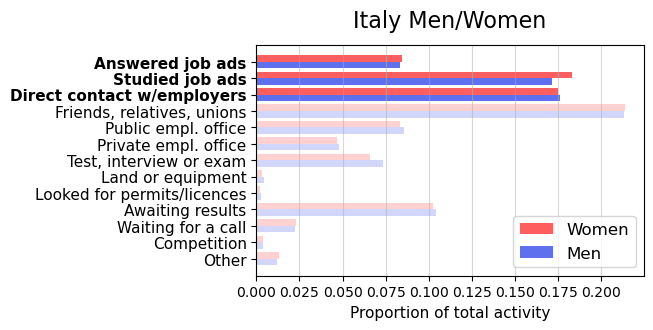

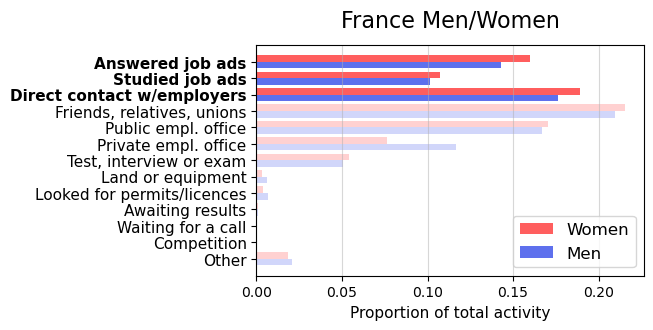

In [1149]:
# plot differences in sex for

plot_method2h(m_de, f_de, 'Germany Men/Women', ['Women', 'Men'])  
plt.show()
plot_method2h(m_it, f_it, 'Italy Men/Women', ['Women', 'Men'])
plt.show()
plot_method2h(m_fr, f_fr, 'France Men/Women',['Women', 'Men'])

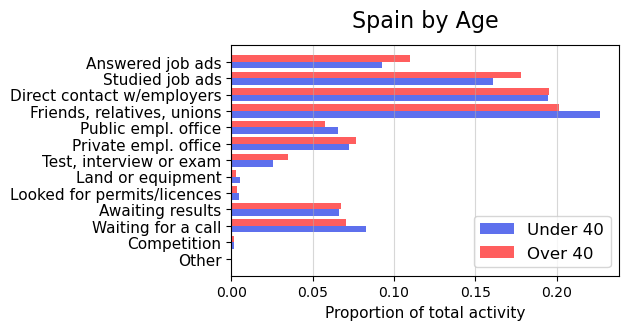

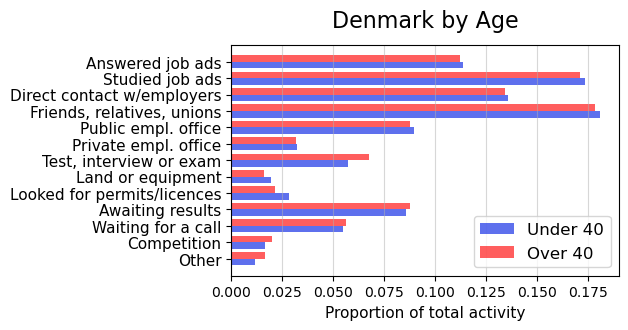

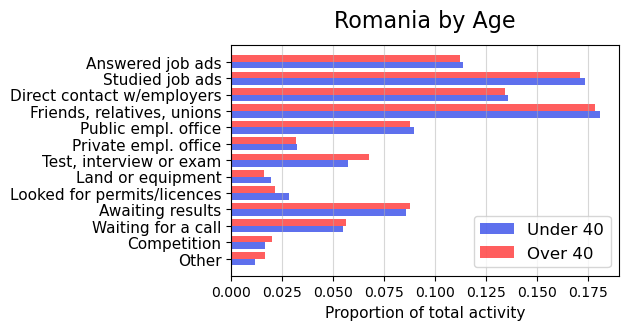

In [1150]:
plot_method2hgen(young_es, old_es, 'Spain by Age', ['Under 40', 'Over 40'])  
plt.show()
plot_method2hgen(young_dk, old_dk, 'Denmark by Age', ['Under 40', 'Over 40'])  
plt.show()
plot_method2hgen(young_ro, old_ro, 'Romania by Age', ['Under 40', 'Over 40'])  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


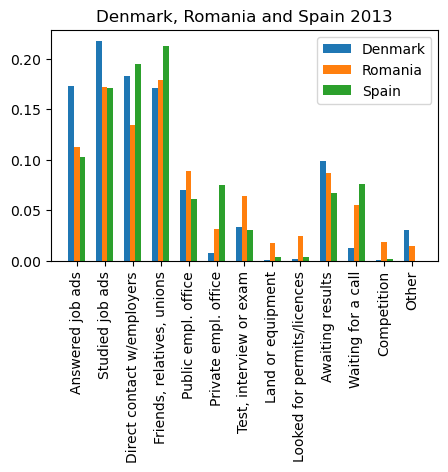

In [1151]:
# Plot Romania Denmark and Spain

plot_method3( dk_13, ro_13,es_13, 'Denmark, Romania and Spain 2013')    


## Aggregating all countries

In [1152]:
# Sum the total number of countries that have the highest proportion of job-seeking 
# activity for each sex

def compare_sex(method): 
    '''
    INPUT
        Method column name
    OUTPUT
        Tuple including number of countries where the method is a higher proportion of all search methods
        for men, for women and the equal
    '''
    men_ls = 0
    wom_ls = 0
    same = 0
    for df in [dk_13, es_13, ro_13,de_13,fi_13, fr_13,lv_13,pt_13,at_13,bg_13,be_13,ie_13,cy_13,it_13, ee_13,hu_13 ,lt_13 ,\
    mt_13 ,nl_13 ,si_13 ,sk_13,lu_13, el_13 ]:

        f, m = sep_sex(df)
        m=m[mets]
        f=f[mets]
        m= m[m.sum(axis=1)>0].sum()/m[m.sum(axis=1)>0].sum().sum()
        f= f[f.sum(axis=1)>0].sum()/f[f.sum(axis=1)>0].sum().sum()
        if m[method]> f[method]:
            men_ls+=1
        elif f[method]> m[method]:
            wom_ls+=1
        else:
            same+=1
    return men_ls, wom_ls, same


In [1153]:
# function for finding the average percentage of seeking activity for a given method for men and women

def sex_avg(method): 
    '''
    INPUT
        Method column name
    OUTPUT
        Tuple including number of countries where the method is a higher proportion of all search methods
        for men, for women and the equal
    '''
    men_ls = 0
    wom_ls = 0
    same = 0
    count = 0
    all_dfs = [dk_13, es_13, ro_13,de_13,fi_13, fr_13,lv_13,pt_13,at_13,bg_13,be_13,ie_13,cy_13,it_13, ee_13,hu_13 ,lt_13 ,\
    mt_13 ,nl_13 ,si_13 ,sk_13,lu_13, el_13 ]
    for df in all_dfs:
        count+=len(df)
        #separate sexes
        f, m = sep_sex(df)
        m=m[mets]
        f=f[mets]
        m= m[m.sum(axis=1)>0].sum()/m[m.sum(axis=1)>0].sum().sum()
        f= f[f.sum(axis=1)>0].sum()/f[f.sum(axis=1)>0].sum().sum()
        
        men_ls+=m[method]
        wom_ls+=f[method]
    return men_ls/len(all_dfs)*100, wom_ls/len(all_dfs)*100
        

In [1154]:
# use compare_sex function on the three methods of focus
tot_df = pd.DataFrame()
tot_df['Responding to job ads'] =  compare_sex('METHODE')
tot_df['Studying job ads'] =  compare_sex('METHODF')
tot_df['Direct contact w/employer'] = compare_sex('METHODC')


print('Direct contact w/employer', compare_sex('METHODC'))
print('Responding to ads', compare_sex('METHODE'))
print('Studying ads', compare_sex('METHODF'))

Direct contact w/employer (16, 7, 0)
Responding to ads (4, 19, 0)
Studying ads (4, 19, 0)


(0.0, 22.0)

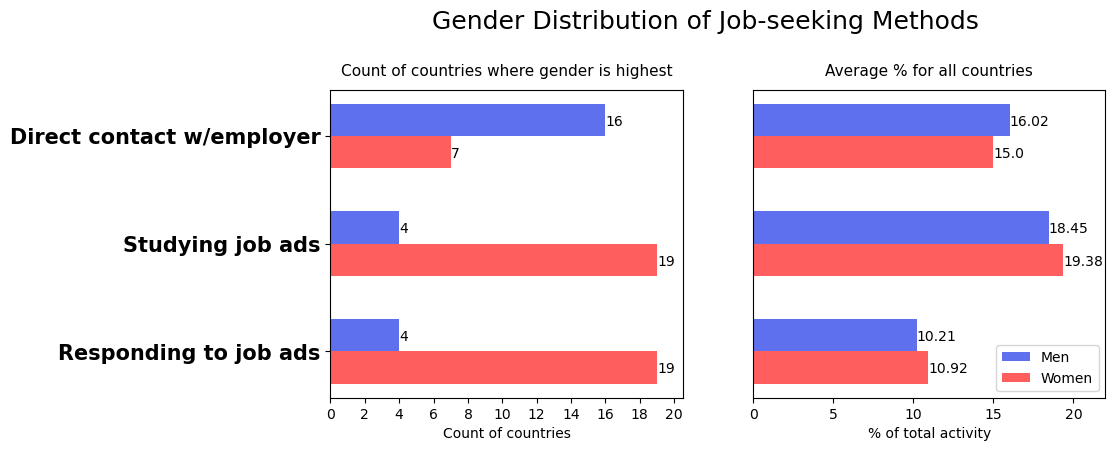

In [1155]:
# Plot gender distribution averages for all countries for each method

x1 = sex_avg(mets)[0][0:3]
x2 =sex_avg(mets)[1][0:3]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

fig.suptitle('Gender Distribution of Job-seeking Methods', y=1.08, fontsize=18)
col1= (.1, .2,.9)
col2= (1, .1,.1)

y_axis0 = np.arange(tot_df.shape[1])
x_axis0 = np.arange(0, tot_df.iloc[1].max()+2, 2)
axes[0].set_xticks(x_axis0, fontsize=11)
axes[0].barh(y_axis0+0.15, tot_df.iloc[0], height=0.3, color=col1, alpha=.7)
axes[0].barh(y_axis0-0.15, tot_df.iloc[1], height=0.3, color=col2, alpha=.7)
axes[0].set_title('Count of countries where gender is highest', fontsize=11, y=1.02)
#axes[0].legend(['Men', 'Women'], prop={'size': 7}, loc='lower right', framealpha=0.5)
axes[0].set_yticks(y_axis0, labels=tot_df.columns, fontsize=15, fontweight='bold')
axes[0].set_xlabel('Count of countries')
for index, value in enumerate(tot_df.iloc[0]):
    axes[0].text(value, index+.1, str(value))

for index, value in enumerate(tot_df.iloc[1]):
    axes[0].text(value, index-.2, str(value))
axes[0].set_xlim(0,20.5)    



x_axis1 = np.arange(len(x1))
axes[1].set_yticks(y_axis0, labels=tot_df.columns, fontsize=14)

axes[1].get_yaxis().set_visible(False)
axes[1].barh(x_axis1+0.15 , x1, height=0.3, color=col1, alpha=0.7)
axes[1].barh(x_axis1-0.15 , x2, height=0.3, color=col2, alpha=0.7)
axes[1].legend(['Men', 'Women'], prop={'size': 10}, loc='lower right')
axes[1].set_title('Average % for all countries', fontsize=11,y=1.02)
axes[1].set_xlabel('% of total activity')
for index, value in enumerate(x1):
    axes[1].text(value, index+.1,
             str(round(value,2)))

for index, value in enumerate(x2):
    axes[1].text(value, index-.2,
             str(round(value,2)))
    
axes[1].set_xlim(0,22)    
    


In [1156]:
# show the average percentage of each method for men and women
for i, j in zip(mets, methods):
    print(j, sex_avg(i))


Answered job ads (10.210187041384064, 10.915309516867602)
Studied job ads (18.446883228194096, 19.3766745083026)
Direct contact w/employers (16.021693444258567, 15.003040842381266)
Friends, relatives, unions (18.735204883513628, 18.40462728099861)
Public empl. office (12.719441617716845, 13.088784290609764)
Private empl. office (5.359281017081011, 4.819056659887572)
Test, interview or exam (4.70674464752082, 4.697440552220971)
Land or equipment (0.42774058428133716, 0.3256172269450635)
Looked for permits/licences (0.467326098048204, 0.3550064706147769)
Awaiting results (5.240316904976815, 5.297624428785933)
Waiting for a call (4.899345308234717, 4.911370010143421)
Competition (0.5212436668872156, 0.6025089468408175)
Other (2.24459155790267, 2.2029392654016022)


# Part 2 Unemployment Logistic Regression
## Demographic factors that correlate with unemployment

In [1157]:
# demographic variables to explore: Nationality, country of employment, sex, age, years living in country
# residing in country,
#https://ec.europa.eu/eurostat/documents/1978984/6037342/EULFS-Database-UserGuide.pdf
dem_vars = ['SEEKWORK','NATIONAL', 'COUNTRYB','COUNTRYW', 'SEX', 'AGE', 'YEARESID']

In [1158]:
# Function for handling missing values 
def rmv_nan(df):
    """
    INPUT
        df - data frame to be cleaned
    OUTPUT
        df - clean dataframe
    Drops rows with no data
    Drops columns with more than 10% null values
    """
        
    # drop rows that are all nans
    df.dropna(how='all', axis=0,inplace=True)
    
    # drop columns with more than 10% null values
    df = df[df.columns[df.isnull().mean()<.10]]
    
    
    df.SEEKWORK.replace(9,0, inplace=True)
    df.SEEKWORK.replace(dict.fromkeys([3,4,1,2], 1), inplace=True)


    df = df[dem_vars].dropna(how='any', axis=0)
    
    return df

In [1159]:
# load and clean data set for Denmark 2013
denmark_13 = pd.read_csv('DK_LFS_2013_Y.csv')
df = rmv_nan(denmark_13)
df.to_csv('full_dk_13.csv')
print(df.shape)


C:\Users\summe\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


(134108, 7)


In [1160]:
pd.options.display.max_seq_items = 200

# make dummy variables for categorical variables. All demographic variables are categorical
for col in dem_vars:
    if df[col].dtype == float:
        df[col] = df[col].astype(int)

    df =  pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_')],\
                        axis=1)


In [1161]:
# drop y value and age groups outside of normal working age
X = df.drop(['SEEKWORK_0','SEEKWORK_1', 'AGE_75', 'AGE_7','AGE_65', 'AGE_20'], axis=1)
y= df['SEEKWORK_1']


In [1162]:
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X), y, test_size=0.33, random_state=42)

lm_model = LogisticRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using was -0.054330460232554056 on 44256 values.'

In [1163]:
y_test_preds = lm_model.predict(X_test)

In [1164]:
r2_score(y_test, y_test_preds)
lm_model.coef_

array([[ 0.01570876, -0.01570876, -0.00583466,  0.00583466, -3.35723771,
         3.35723771,  0.00739027, -0.00739027,  1.4833433 ,  1.69142426,
        -0.00583466, -0.04747359,  0.07643314]])

In [1165]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the logistic model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a logistical model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X.columns
    coefs_df['coefs'] = lm_model.coef_[0]
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_[0])
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

# look at the results
coef_df

,est_int,coefs,abs_coefs
4,COUNTRYW_000-OWN COUNTRY,-3.357238,3.357238
5,COUNTRYW_NO ANSWER,3.357238,3.357238
9,AGE_47,1.691424,1.691424
8,AGE_32,1.483343,1.483343
12,YEARESID_11,0.076433,0.076433
11,YEARESID_5,-0.047474,0.047474
0,NATIONAL_000-OWN COUNTRY,0.015709,0.015709
1,NATIONAL_005-EU28,-0.015709,0.015709
6,SEX_1,0.007390,0.007390
7,SEX_2,-0.007390,0.007390


NO ANSWER          76137
000-OWN COUNTRY    67175
Name: COUNTRYW, dtype: int64